<a href="https://colab.research.google.com/github/anhphuong012/ML-2023/blob/main/Lab_7_20130371_NguyenNgocPhuong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/lab'

Mounted at /content/gdrive
/content/gdrive/MyDrive/lab


In [29]:
# code
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics.cluster import completeness_score
from sklearn.cluster import AgglomerativeClustering
from scipy import special
from scipy.cluster.hierarchy import linkage, dendrogram


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
data = datasets.load_iris()
X = data['data']
Y = data['target']

sigmod = svm.SVC(kernel = "linear",random_state=0);
scoring = ['accuracy','precision_macro', 'recall_macro','f1_macro']

score = cross_validate(sigmod,X,Y,scoring=scoring,cv= 10)
print(sorted(score.keys()))

print("Accuracy:" + str(np.mean((score['test_accuracy']))))
print("F1:" + str(np.mean(score['test_f1_macro'])))
print("PrecisionPrecision:" +str(np.mean(score['test_precision_macro'])))
print("RecallRecall:" +str(np.mean(score['test_recall_macro'])))


['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
Accuracy:0.9733333333333334
F1:0.9726430976430975
PrecisionPrecision:0.9793650793650794
RecallRecall:0.9733333333333333


In [ ]:
#code

*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X, Y)

feature_imp = pd.Series(clf.feature_importances_,index=data.feature_names).sort_values(ascending=False)
features = feature_imp.index[0:2]

df = pd.DataFrame(data['data'], columns = data.feature_names)
df['species'] = data['target']
X1 = df[features]
y1=df['species']       

In [ ]:
#code


scoring = ['accuracy','precision_macro', 'recall_macro','f1_macro']

score = cross_validate(clf,X1,y1,scoring=scoring,cv= 10)
print(sorted(score.keys()))

print("Accuracy:" + str(np.mean((score['test_accuracy']))))
print("F1:" + str(np.mean(score['test_f1_macro'])))
print("PrecisionPrecision:" +str(np.mean(score['test_precision_macro'])))
print("RecallRecall:" +str(np.mean(score['test_recall_macro'])))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
Accuracy:0.9666666666666666
F1:0.9663299663299663
PrecisionPrecision:0.9722222222222223
RecallRecall:0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [10]:
# code

mnist = datasets.load_digits()
X = mnist['data']
Y = mnist['target']

kmeans = KMeans(n_clusters = 10, init ="random",random_state = 0)
kmeans.fit_transform(X,Y)
clusters = kmeans.predict(mnist.data)

accuracy_kmean = accuracy_score(mnist.target,clusters)
precision_kmean = precision_score(mnist.target,clusters,average='macro')
recall_kmean = recall_score(mnist.target,clusters,average='macro')
f1_kmean = f1_score(mnist.target,clusters,average='macro')

print(accuracy_kmean)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.2598775737340011


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [12]:
# code

model = GaussianNB()
scoring = ['accuracy','precision_macro', 'recall_macro','f1_macro']

score = cross_validate(model,X,Y,scoring=scoring,cv= 10)
accuracy_navie =  np.mean(score['test_accuracy'])
f1_navie = np.mean(score['test_f1_macro'])
precision_navie = np.mean(score['test_precision_macro'])
recall_navie = np.mean(score['test_recall_macro'])

print(accuracy_navie)



0.8113904407200497


In [13]:
clf=RandomForestClassifier(n_estimators=100)

scoring = ['accuracy','precision_macro', 'recall_macro','f1_macro']

score = cross_validate(clf,X,Y,scoring=scoring,cv= 10)
accuracy_random =  np.mean(score['test_accuracy'])
f1_random = np.mean(score['test_f1_macro'])
precision_random = np.mean(score['test_precision_macro'])
recall_random = np.mean(score['test_recall_macro'])

print(accuracy_random)


0.9482464307883302


In [14]:
knm = KNeighborsClassifier(n_neighbors=7)

scoring = ['accuracy','precision_macro', 'recall_macro','f1_macro']

score = cross_validate(knm,X,Y,scoring=scoring,cv= 10)
accuracy_knm =  np.mean(score['test_accuracy'])
f1_knm = np.mean(score['test_f1_macro'])
precision_knm = np.mean(score['test_precision_macro'])
recall_knm = np.mean(score['test_recall_macro'])

print(accuracy_knm)


0.9677343265052762


In [15]:
t = PrettyTable(["Algorithms","Accuracy","Precision","Recall","F1"])
t.add_row(['K-Means.',accuracy_kmean,precision_kmean,recall_kmean,f1_kmean])
t.add_row(['Randomforest.',accuracy_random,precision_random,recall_random,f1_random])
t.add_row(['Naïve Bayes.',accuracy_navie,precision_navie,recall_navie,f1_navie])
t.add_row(['KNN.',accuracy_knm,precision_knm,recall_knm,f1_knm])
print(t)

+---------------+--------------------+---------------------+---------------------+--------------------+
|   Algorithms  |      Accuracy      |      Precision      |        Recall       |         F1         |
+---------------+--------------------+---------------------+---------------------+--------------------+
|    K-Means.   | 0.2598775737340011 | 0.25261630590849576 | 0.26071035038434803 | 0.2550489600288401 |
| Randomforest. | 0.9482464307883302 |  0.9544555001877321 |  0.9482301341589269 | 0.9476663511328945 |
|  Naïve Bayes. | 0.8113904407200497 |  0.8480837289405493 |  0.8114189886480908 | 0.8090382615408214 |
|      KNN.     | 0.9677343265052762 |  0.9709136747841083 |  0.9676590987272103 | 0.9674198694259083 |
+---------------+--------------------+---------------------+---------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
# Randomforest, Naive,Knn bester K-mean => Supervised learning better

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [18]:
aggloClus = AgglomerativeClustering(n_clusters=10)

aggloClus.fit(mnist.data)
cluster = aggloClus.fit_predict(mnist.data)

print(accuracy_score(mnist.target,cluster))

0.19365609348914858


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





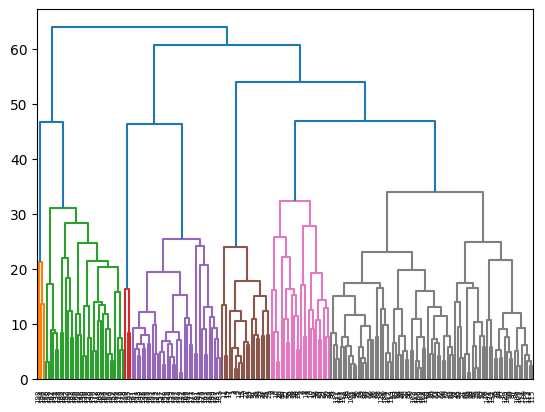

In [52]:
#code

data = pd.read_csv('shopping-data.csv')
clean_data = data.drop(["CustomerID","Genre"], axis=1)
data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(clean_data)
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(clean_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")



dendrogram(average_clustering)
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


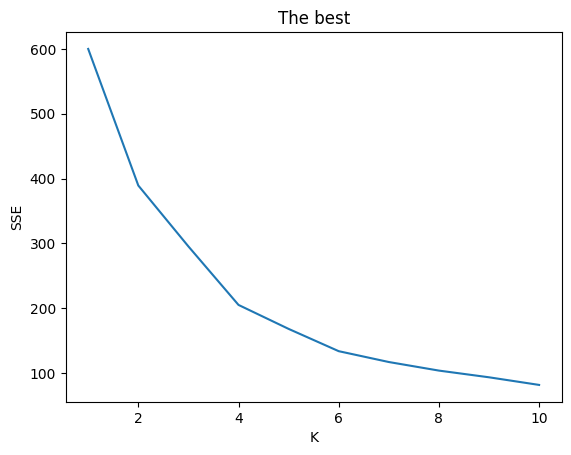

In [49]:
#code
clean = data.drop(["CustomerID"],axis = 1)



sse = []
k_s =[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans.fit(scaled_data)
  sse.append(kmeans.inertia_)
  k_s.append(k)


plt.plot(k_s,sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("The best")
plt.show()





*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.